# train_dqn_final_report.ipynb

### AUTHOR: JOHN GAYNES
### CSPB 3202 - Artificial Intelligence
### FINAL PROJECT - 

In [27]:
# --- Setup --- 
import os
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

In [ ]:
# --- Paths ---
log_dir = "logs/dqn_breakout/qrdqn_v1_20250428-070502"
plots_dir = "plots"
os.makedirs(plots_dir, exist_ok=True)

In [ ]:
# # --- Find latest run ---
# all_runs = [os.path.join(log_dir, d) for d in os.listdir(log_dir) if os.path.isdir(os.path.join(log_dir, d))]
# latest_run = max(all_runs, key=os.path.getmtime)
# print(f"Analyzing training logs from: {latest_run}")

ValueError: max() arg is an empty sequence

In [ ]:
# --- Load event data ---
ea = EventAccumulator(log_dir)
ea.Reload()
print("Available scalar tags:", ea.Tags()["scalars"])

DirectoryDeletedError: Directory logs/dqn_breakout/qrdqn_v1_20250428-221445 has been permanently deleted

In [14]:
# --- Tags to plot ---
tags = {
    "rollout/ep_rew_mean": "Mean Episode Reward",
    "rollout/ep/len/mean": "Mean Episode Length",
    "rollout/exploration_rate": "Exploratioin Rate",
    "time/fps": "Frames Per Second",
}

Saved final training summary plot to: plots/training_summary_20250428-070502.pdf
Saved final training summary plot to: plots/training_summary_20250428-070502.pdf
Saved final training summary plot to: plots/training_summary_20250428-070502.pdf
Saved final training summary plot to: plots/training_summary_20250428-070502.pdf


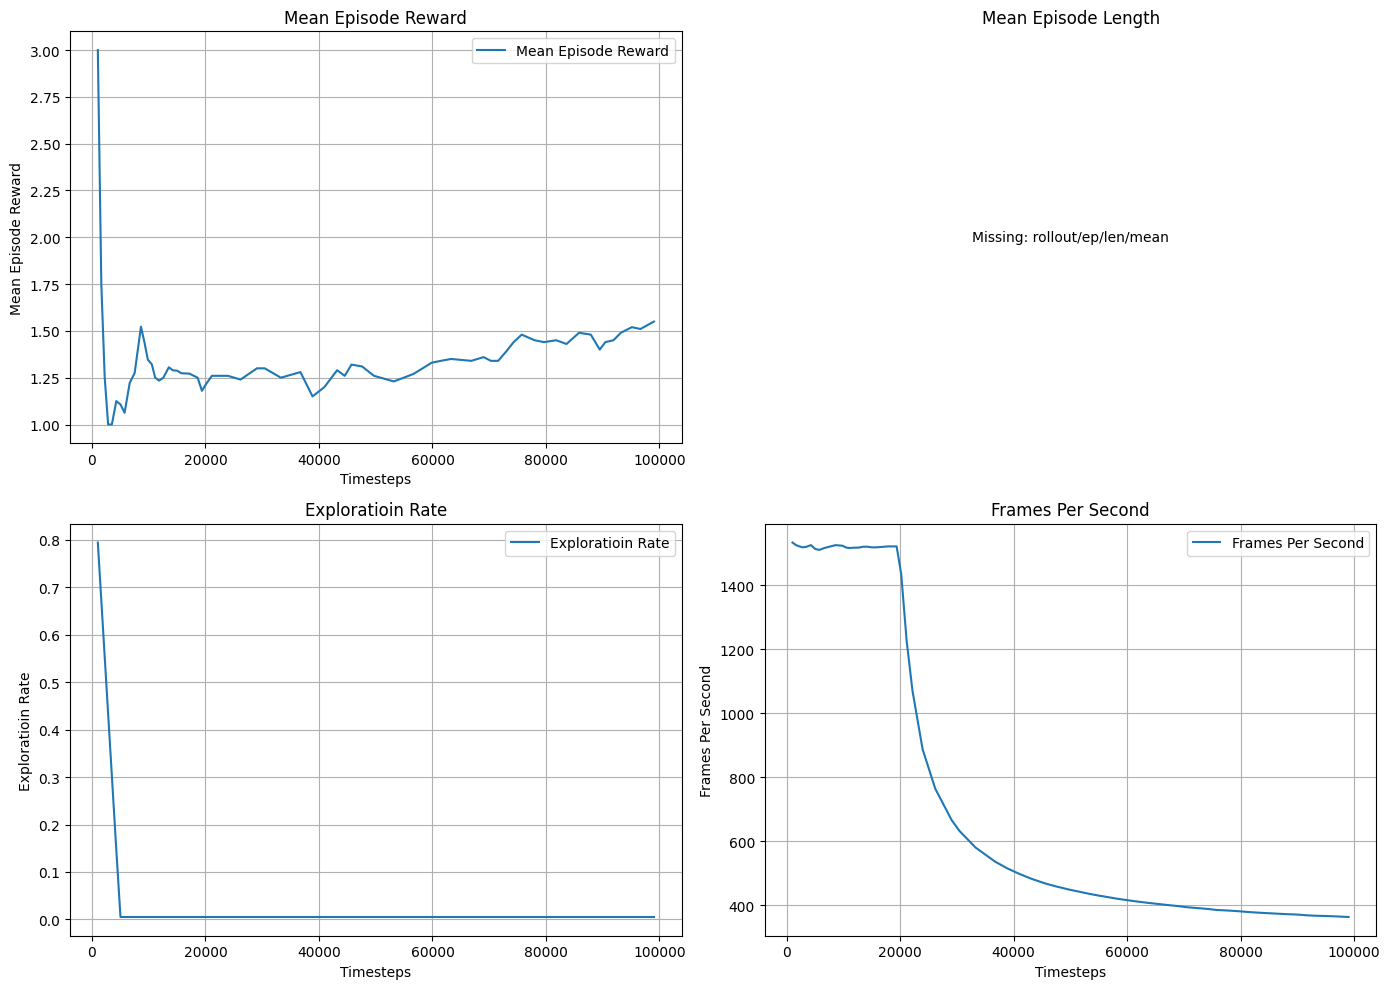

In [26]:
# --- Plot each metric ---
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for idx, (tag, title) in enumerate(tags.items()):
    try:
        events = ea.Scalars(tag)
        steps = [e.step for e in events]
        values = [e.value for e in events]

        axs[idx].plot(steps, values, label=title)
        axs[idx].set_title(title)
        axs[idx].set_xlabel("Timesteps")
        axs[idx].set_ylabel(title)
        axs[idx].set_label(title)
        axs[idx].grid(True)
        axs[idx].legend()

    except KeyError:
        axs[idx].text(0.5, 0.5, f"Missing: {tag}", ha='center', va='center')
        axs[idx].set_title(title)
        axs[idx].axis('off')

    plt.tight_layout()
    summary_pdf_path = os.path.join(plots_dir, "training_summary_20250428-070502.pdf")
    plt.savefig(summary_pdf_path)
    print(f"Saved final training summary plot to: {summary_pdf_path}")

"""
# Training Graph Interpretations

## 1. Mean Episode Reward
- Shows the average score per completed game.
- Rising trend indicates improved agent skill.

## 2. Mean Episode Length
- Shows how long the agent survives in each game.
- Typically grows alongside reward in survival tasks


## 3. Exploration Rate
- Shows how long the agent survives in each game.
- Typically grows alongside reward in survival tasks.

# 4. Frames Per Second (FPS)
- Measures training speed.
- Higher FPS means faster training, but doesn't affect agent quality.
"""